# First Model

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sn
import pickle
import sklearn

In [2]:
processed_data_path='/Users/aarojas/Documents/Data_Science_Resources/Insight_20B/AAR_Insight_Project/Firearm_Detection/data/processed/'
ESC50_MFCC_train=np.loadtxt(processed_data_path+'ESC50_MFCC_train.csv',delimiter=',')
firearm_MFCC_train=np.loadtxt(processed_data_path+'firearm_MFCC_train.csv',delimiter=',')

firearm_logMS_train=np.loadtxt(processed_data_path+'firearm_logMS_train.csv',delimiter=',')
ESC50_logMS_train=np.loadtxt(processed_data_path+'ESC50_logMS_train.csv',delimiter=',')


In [3]:
print(ESC50_MFCC_train.shape)
print(firearm_MFCC_train.shape)
print(ESC50_logMS_train.shape)
print(firearm_logMS_train.shape)

(500, 2600)
(89, 2600)
(500, 16640)
(89, 16640)


Next, I will merge the two into one and then also instantiate an output vector. 

In [4]:
def training_data(ESC50_train,firearm_train,printing=False):
    '''combine the two classifiers into one matrix for training then shuffle the rows
    return the final X_train and Y_train data'''
    X_train=np.concatenate((ESC50_train,firearm_train),axis=0)
    Y_train=np.concatenate((np.zeros((ESC50_train.shape[0],1)),np.ones((firearm_train.shape[0],1))))
    #
    n_col=ESC50_train.shape[1]
    # shuffle the rows
    XY_train=np.concatenate((X_train,Y_train),axis=1)
    np.random.shuffle(XY_train) # shuffle the rows
    X_train_rand=XY_train[:,:n_col]
    Y_train_rand=np.reshape(XY_train[:,n_col],(X_train_rand.shape[0],1))
    #
    if printing==True:
        print('The original X_train: ',X_train.shape)
        print('The original Y_train: ', Y_train.shape)
        print('The combined XY_train: ',XY_train.shape)
        print('The randomized X_train: ',X_train_rand.shape)
        print('The randomized Y_train: ',Y_train_rand.shape)
    return X_train_rand,Y_train_rand

In [18]:
X_mfcc_train,Y_mfcc_train=training_data(ESC50_MFCC_train[0:500:6,:],firearm_MFCC_train,printing=True)
X_logMS_train, Y_logMS_train=training_data(ESC50_logMS_train[0:500:6,:],firearm_logMS_train,printing=True)

The original X_train:  (173, 2600)
The original Y_train:  (173, 1)
The combined XY_train:  (173, 2601)
The randomized X_train:  (173, 2600)
The randomized Y_train:  (173, 1)
The original X_train:  (173, 16640)
The original Y_train:  (173, 1)
The combined XY_train:  (173, 16641)
The randomized X_train:  (173, 16640)
The randomized Y_train:  (173, 1)


## Using a Logistic Regression

Logistic regression on the MFCC feature.

In [19]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_mfcc_train, Y_mfcc_train.ravel())
clf.score(X_mfcc_train,Y_mfcc_train)

0.9942196531791907

Logistic regression on the LogMS feature

In [36]:
clf=LogisticRegression(max_iter=1000)
clf.fit(X_logMS_train,Y_logMS_train.ravel())
clf.score(X_logMS_train,Y_logMS_train)

1.0

## Testing the Logisitic Regression Model with some Testing Data

Load the test data: 

In [30]:
def LoadTestData(esc50_test_filename,firearm_test_filename):
    ESC50_test=np.loadtxt(processed_data_path+esc50_test_filename,delimiter=',')
    firearm_test=np.loadtxt(processed_data_path+firearm_test_filename,delimiter=',')
    print('Number of ESC50: ', len(ESC50_test))
    print('\nNumber of firearm sounds: ', len(firearm_test))
    return ESC50_test, firearm_test

ESC50_MFCC_test, firearm_MFCC_test=LoadTestData('ESC50_MFCC_test.csv','firearm_MFCC_test.csv')

Number of ESC50:  50

Number of firearm sounds:  39


In [31]:
ESC50_logMS_test,firearm_logMS_test=LoadTestData('ESC50_logMS_test.csv','firearm_logMS_test.csv')


Number of ESC50:  50

Number of firearm sounds:  39


Combine the test data into a single matrix: 

In [32]:
def testing_data(ESC50_test,firearm_test,printing=False):
    '''combine the two classifiers into one matrix for training then shuffle the rows
    return the final X_train and Y_train data'''
    X_test=np.concatenate((ESC50_test,firearm_test),axis=0)
    Y_test=np.concatenate((np.zeros((ESC50_test.shape[0],1)),np.ones((firearm_test.shape[0],1))))
    #
    if printing==True:
        print('The original X_train: ',X_test.shape)
        print('The original Y_train: ',Y_test.shape)
        
    n_col=ESC50_test.shape[1] 
    
    XY_test=np.concatenate((X_test,Y_test),axis=1)
    np.random.shuffle(XY_test)
    X_test_rand=XY_test[:,:n_col]
    Y_test_rand=np.reshape(XY_test[:,n_col],(X_test_rand.shape[0],1))
    
    if printing==True:
        print('The combined XY_test: ',XY_test.shape)
        print('The shuffled X_test: ',X_test_rand.shape)
        print('The shuffled Y_test: ',Y_test_rand.shape)

    return X_test_rand, Y_test_rand

In [33]:
X_mfcc_test,Y_mfcc_test=testing_data(ESC50_MFCC_test[:39,:],firearm_MFCC_test,printing=True)

The original X_train:  (78, 2600)
The original Y_train:  (78, 1)
The combined XY_test:  (78, 2601)
The shuffled X_test:  (78, 2600)
The shuffled Y_test:  (78, 1)


In [35]:
X_logMS_test,Y_logMS_test=testing_data(ESC50_logMS_test[:39,:],firearm_logMS_test)

Visualize the output vector:

Visualize the shuffled data:

Run a prediction on the test data: 

In [25]:
LR_predictions = np.reshape(clf.predict(X_mfcc_test),(Y_mfcc_test.shape[0],Y_mfcc_test.shape[1]))
#print ('Accuracy of logistic regression: %d ' % float((np.dot(Y_mfcc_test,LR_predictions) + np.dot(1-Y_mfcc_test,1-LR_predictions))/float(Y_mfcc_test.size)*100) +
#       '% ' + "(percentage of correctly labelled datapoints)")

In [38]:
Y_logMS_predict=clf.predict(X_logMS_test)

In [40]:
conf_mat=sklearn.metrics.confusion_matrix(Y_logMS_test,Y_logMS_predict)
conf_mat

array([[ 1, 38],
       [14, 25]])

Make a confusion matrix to understand accuracy:

In [26]:
conf_mat=sklearn.metrics.confusion_matrix(Y_mfcc_test, LR_predictions)
conf_mat

array([[ 1, 38],
       [ 9, 30]])

Thus in binary classification, the count of true negatives is , false negatives is , true positives is  and false positives is .
* The element, c$_{0,0}$, is equal to 1.  This indicates that there is 1 true negative.
* The element, c$_{1,0}$, is equal to 15.  This indicates that there are 15 false negatives.
* The element, c$_{0,1}$, is equal to 38.  This indicates that there are 38 false positives. 
* The element, c$_{1,1}$, is equal to 24.  Thus, there are 24 true positives. 

In the context of predicting firearms, the presence of false negatives is grave.  This means that the 4 sounds were actually the sounds of firearms, but it was predicted that they were not.   

Graph the results:

Graph the results with seaborn:

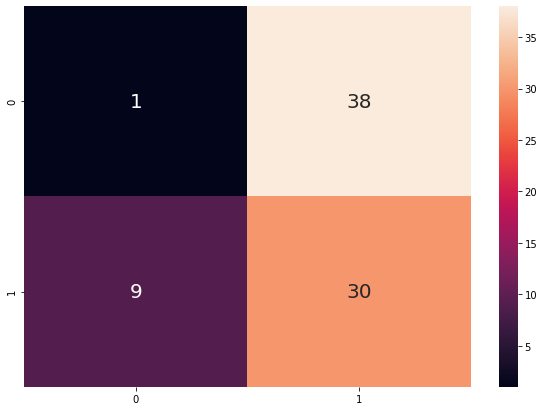

In [27]:
df_cm = pd.DataFrame(conf_mat, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,annot_kws={"size": 20})

Save this model so that it can be incorporated in app.py

In [ ]:
models_path='/Users/aarojas/Documents/Data_Science_Resources/Insight_20B/AAR_Insight_Project/Firearm_Detection/models/'
filename = 'logistic_regression_model.pickle'
pickle.dump(clf, open(models_path+filename, 'wb'))

In [ ]:
print(pickle.format_version)

# Training a Model in TensorFlow

In [ ]:
from tensorflow.keras import layers

NN = tf.keras.Sequential()
# Adds a densely-connected layer with 64 units to the model:
NN.add(layers.Dense(532, activation='relu'))
# Add another:
NN.add(layers.Dense(64, activation='relu'))
# Add an output layer with 1 output units:
NN.add(layers.Dense(1))

NN.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=NN.fit(X_train_rand, Y_train_rand, epochs=5, batch_size=32)

In [ ]:
NN.summary()

In [ ]:
pd.DataFrame(history.history).plot(figsize=(4,4),fontsize=20)
plt.grid(True)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss & Accuracy',fontsize=20)
plt.legend(fontsize=20,loc='center')

In [ ]:
NN.evaluate(X_test_rand, Y_test_rand)

In [ ]:
Y_NNpredictions = NN.predict(X_test_rand)
Y_NNpredictions
#conf_mat=sklearn.metrics.confusion_matrix(Y_test_rand, Y_NNpredictions)
#conf_mat

In [ ]:
df_cm = pd.DataFrame(conf_mat, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,annot_kws={"size": 20})